In [1]:
import pandas as pd, numpy as np, seaborn as sns;
import matplotlib.pyplot as plt;
import sklearn;
from sklearn.tree import DecisionTreeClassifier as DTC;
from sklearn.model_selection import cross_val_predict;
from sklearn.metrics import classification_report;
from sklearn.preprocessing import LabelEncoder;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.neighbors import LocalOutlierFactor;
from sklearn.model_selection import cross_validate;
from sklearn.preprocessing import KBinsDiscretizer;

import warnings;
warnings.filterwarnings('ignore')

In [2]:
music_data = pd.read_csv(r"..\data\Data\features_3_sec.csv")
music_data = music_data[['label','chroma_stft_mean','chroma_stft_var','rms_mean','rms_var','spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean','spectral_bandwidth_var','rolloff_mean','rolloff_var','zero_crossing_rate_mean','zero_crossing_rate_var','harmony_mean','harmony_var','tempo']]
music_data.head()

numeric_data = music_data.select_dtypes(include=['int64','float64'])
cat_data = music_data.select_dtypes(exclude=['int64','float64'])


In [3]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    9990 non-null   object 
 1   chroma_stft_mean         9990 non-null   float64
 2   chroma_stft_var          9990 non-null   float64
 3   rms_mean                 9990 non-null   float64
 4   rms_var                  9990 non-null   float64
 5   spectral_centroid_mean   9990 non-null   float64
 6   spectral_centroid_var    9990 non-null   float64
 7   spectral_bandwidth_mean  9990 non-null   float64
 8   spectral_bandwidth_var   9990 non-null   float64
 9   rolloff_mean             9990 non-null   float64
 10  rolloff_var              9990 non-null   float64
 11  zero_crossing_rate_mean  9990 non-null   float64
 12  zero_crossing_rate_var   9990 non-null   float64
 13  harmony_mean             9990 non-null   float64
 14  harmony_var             

In [4]:

cat_data.describe().to_csv("cat_description.csv")
music_data.describe().to_csv("num_description.csv")


In [7]:
music_data.describe()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,tempo
count,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000
mean,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,1.628790e+06,0.102578,0.002620,-0.000365,1.259757e-02,124.887709
std,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,1.489398e+06,0.045651,0.003614,0.001699,1.263324e-02,32.911676
min,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,1.145102e+03,0.013525,0.000005,-0.026672,9.312309e-23,24.377211
25%,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,5.595514e+05,0.067290,0.000628,-0.000127,4.086402e-03,103.359375
50%,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,1.160080e+06,0.097868,0.001390,-0.000013,8.429785e-03,123.046875
75%,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,2.262437e+06,0.132749,0.003058,0.000015,1.730287e-02,143.554688
max,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,1.298320e+07,0.347705,0.065185,0.015688,1.270515e-01,287.109375


In [5]:
print(music_data.isnull().sum()/len(music_data)*100)


label                      0.0
chroma_stft_mean           0.0
chroma_stft_var            0.0
rms_mean                   0.0
rms_var                    0.0
spectral_centroid_mean     0.0
spectral_centroid_var      0.0
spectral_bandwidth_mean    0.0
spectral_bandwidth_var     0.0
rolloff_mean               0.0
rolloff_var                0.0
zero_crossing_rate_mean    0.0
zero_crossing_rate_var     0.0
harmony_mean               0.0
harmony_var                0.0
tempo                      0.0
dtype: float64


In [ ]:
music_data.tempo.hist(figsize=(7,10))


In [ ]:
music_data.rolloff_mean.hist(figsize=(7,10))


In [ ]:
music_data.rms_mean.hist(figsize=(7,10))


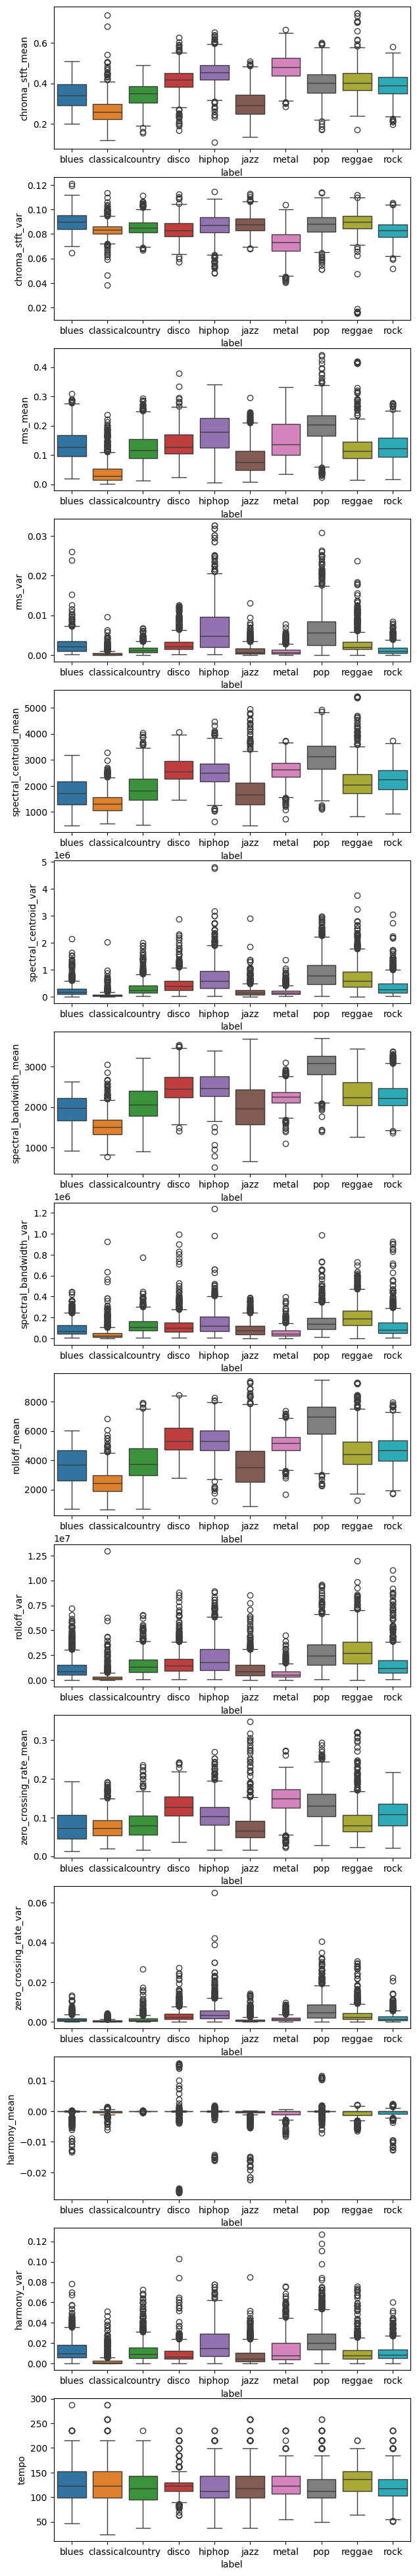

In [9]:
plt.figure(figsize=(7,50))
for i in enumerate(numeric_data.columns):
    plt.subplot(len(numeric_data.columns),1,i[0]+1)
    sns.boxplot(x = "label", y=i[1], hue='label', data = music_data);


Text(0.5, 0, 'Genre')

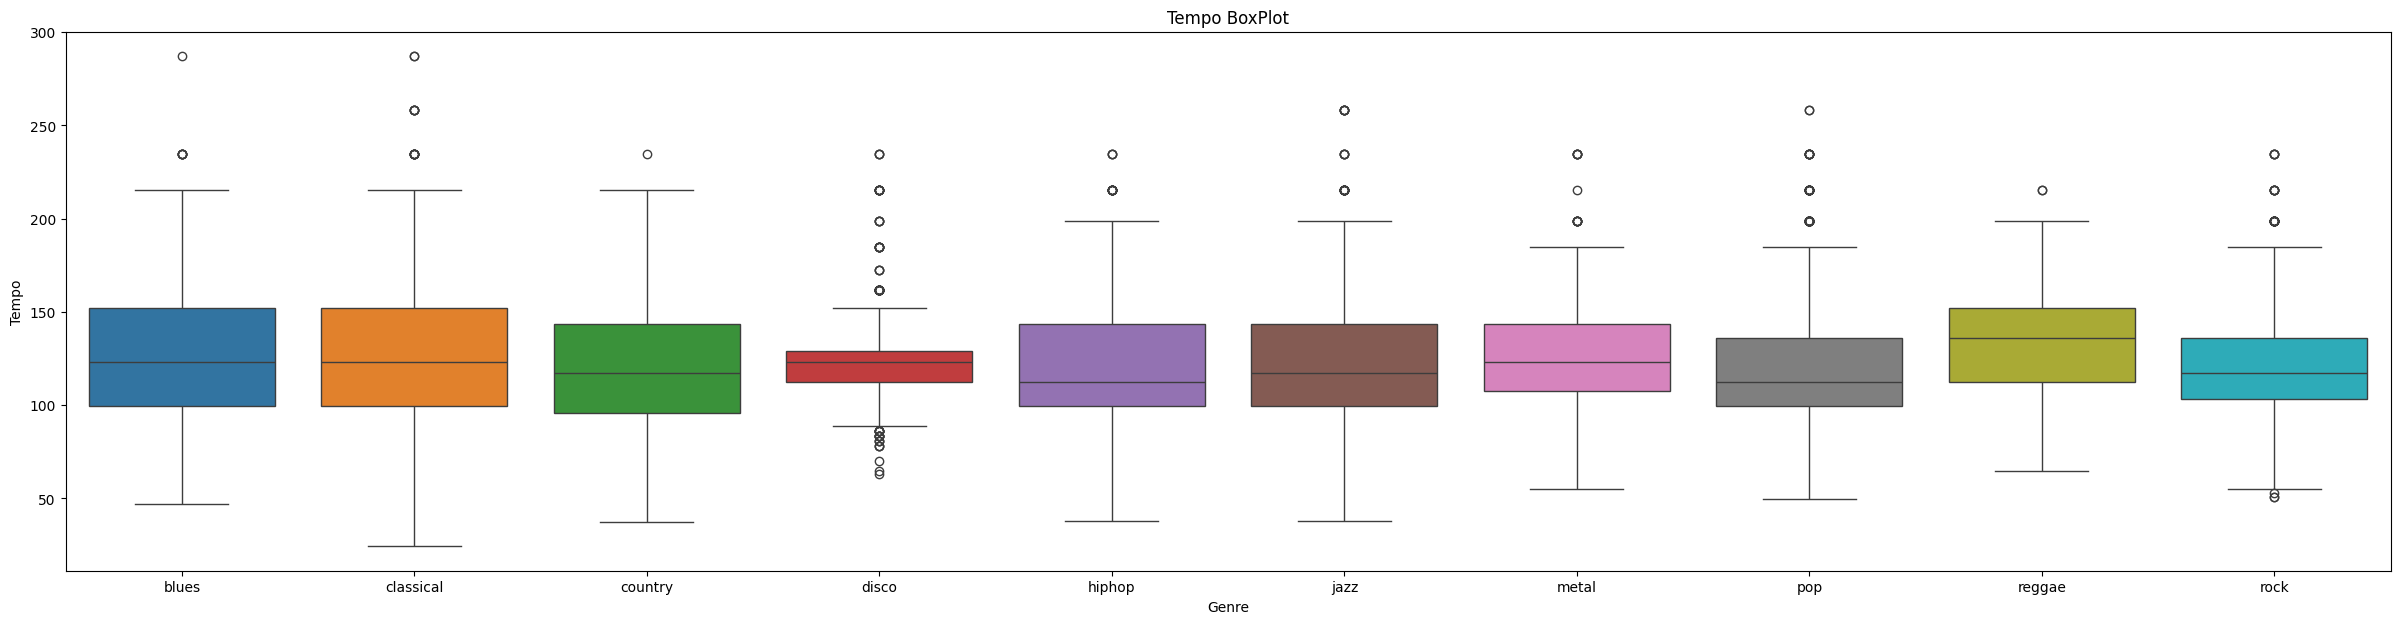

In [8]:
plt.figure(figsize=(30, 7));
sns.boxplot(x = "label", y = "tempo", hue='label', data = music_data[["label", "tempo"]]);
plt.title('Tempo BoxPlot')
plt.ylabel("Tempo")
plt.xlabel("Genre")


Text(0.5, 0, 'Genre')

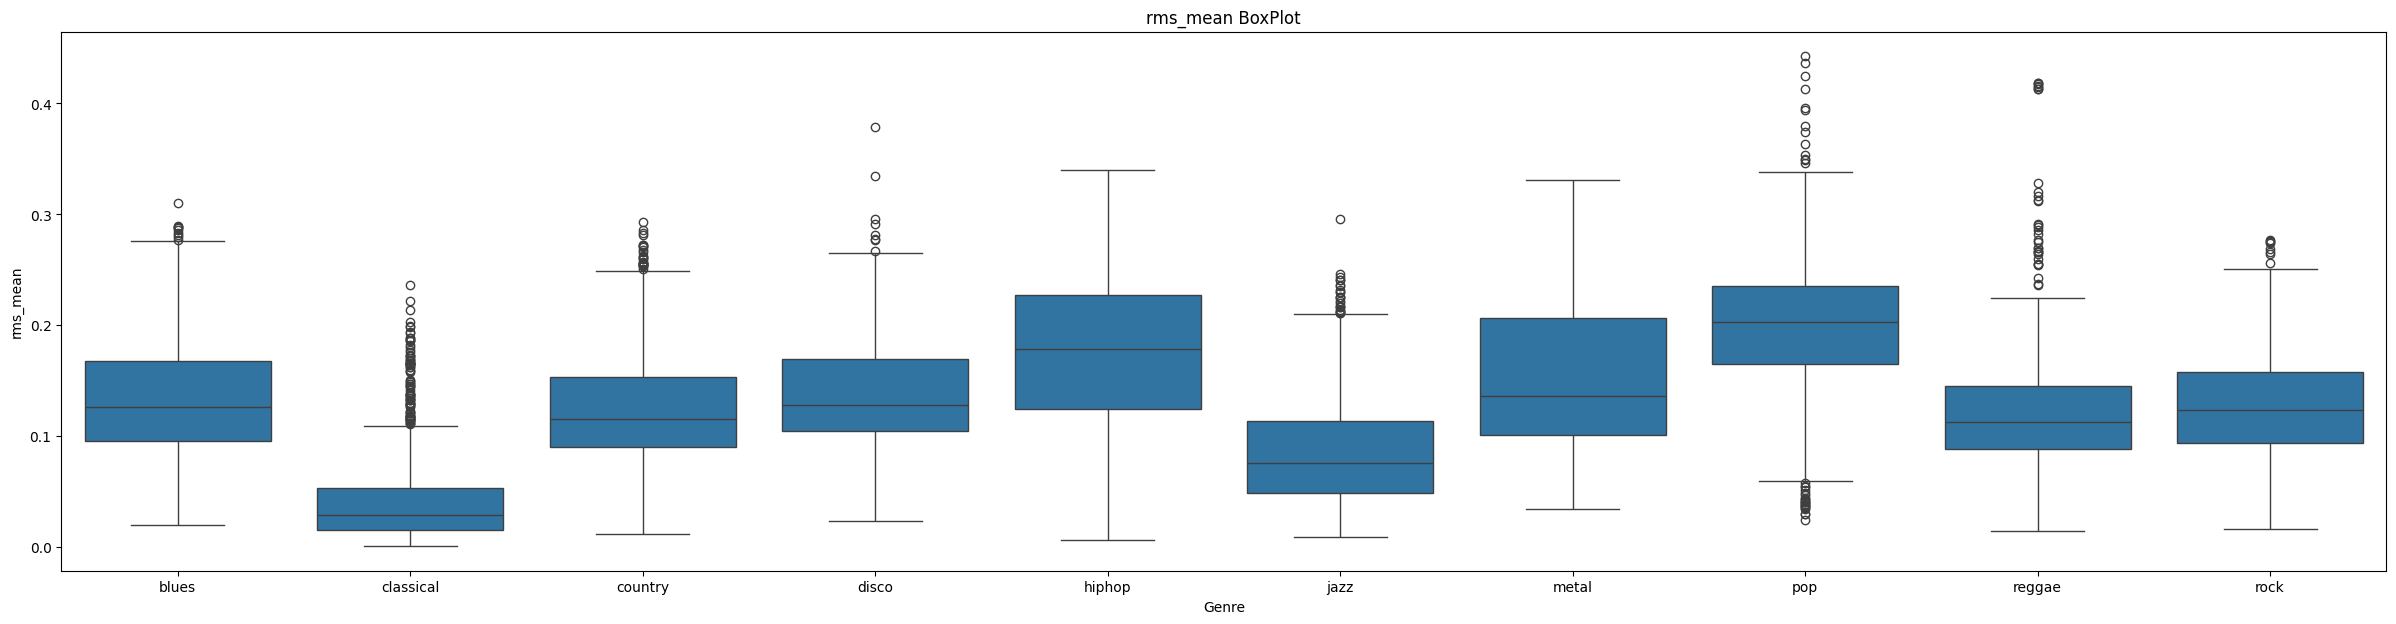

In [22]:
plt.figure(figsize=(30, 7));
sns.boxplot(x = "label", y = "rms_mean", data = music_data[["label", "rms_mean"]]);
plt.title('rms_mean BoxPlot')
plt.ylabel("rms_mean")
plt.xlabel("Genre")

Text(0.5, 0, 'Genre')

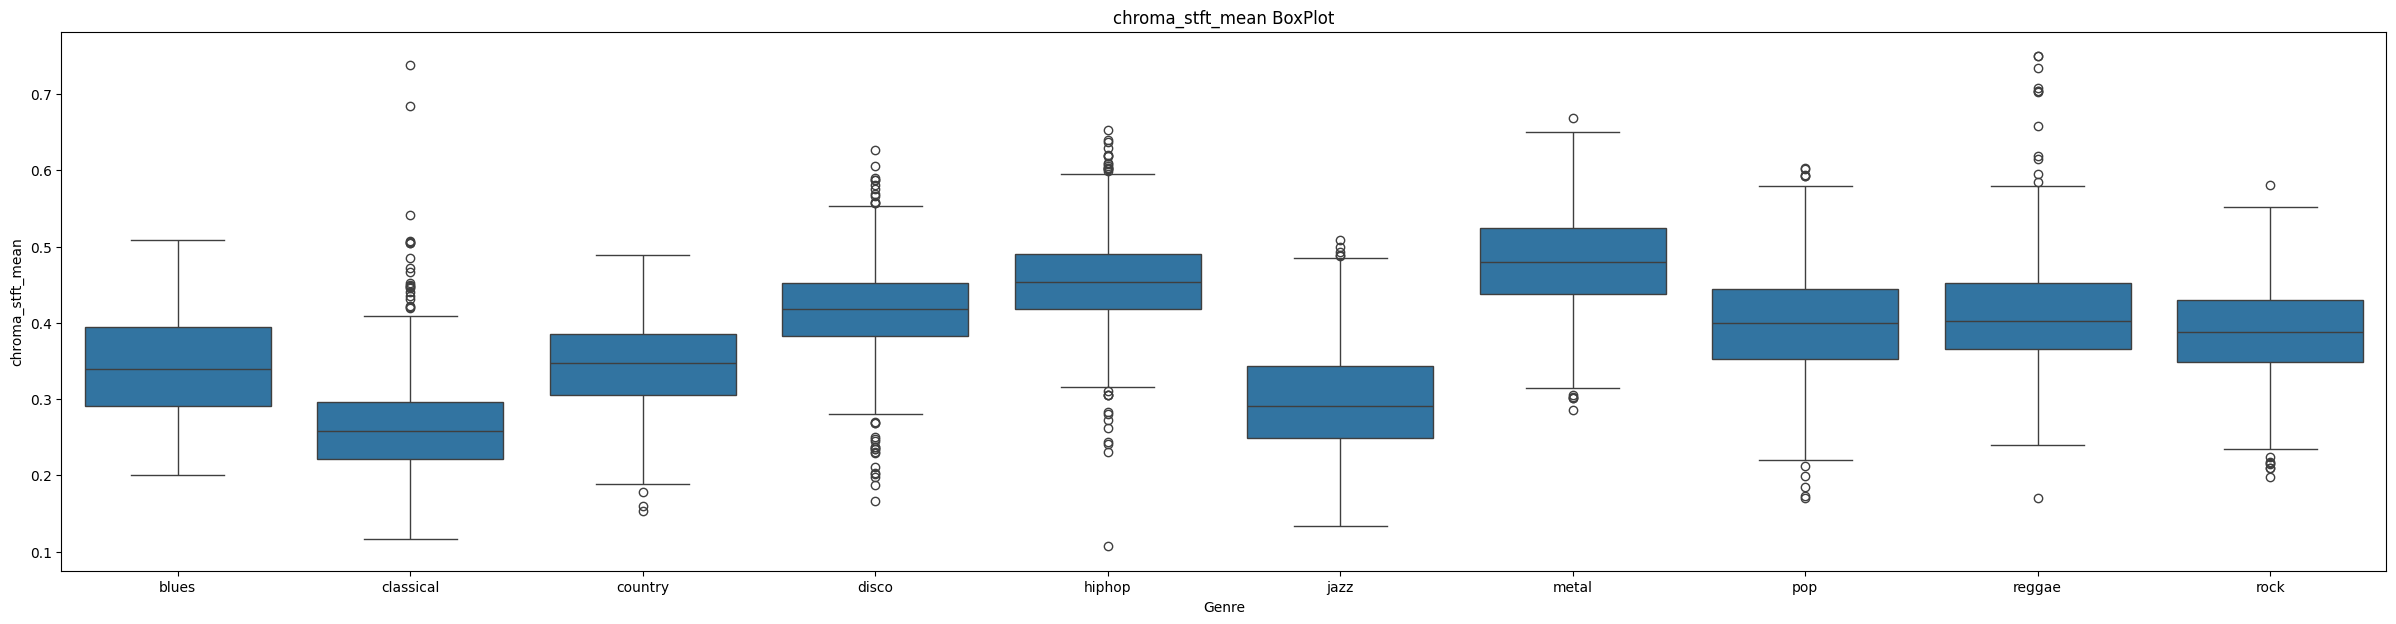

In [21]:
plt.figure(figsize=(30, 7));
sns.boxplot(x = "label", y = "chroma_stft_mean", data = music_data[["label", "chroma_stft_mean"]]);
plt.title('chroma_stft_mean BoxPlot')
plt.ylabel("chroma_stft_mean")
plt.xlabel("Genre")

<Axes: xlabel='spectral_bandwidth_var', ylabel='rolloff_var'>

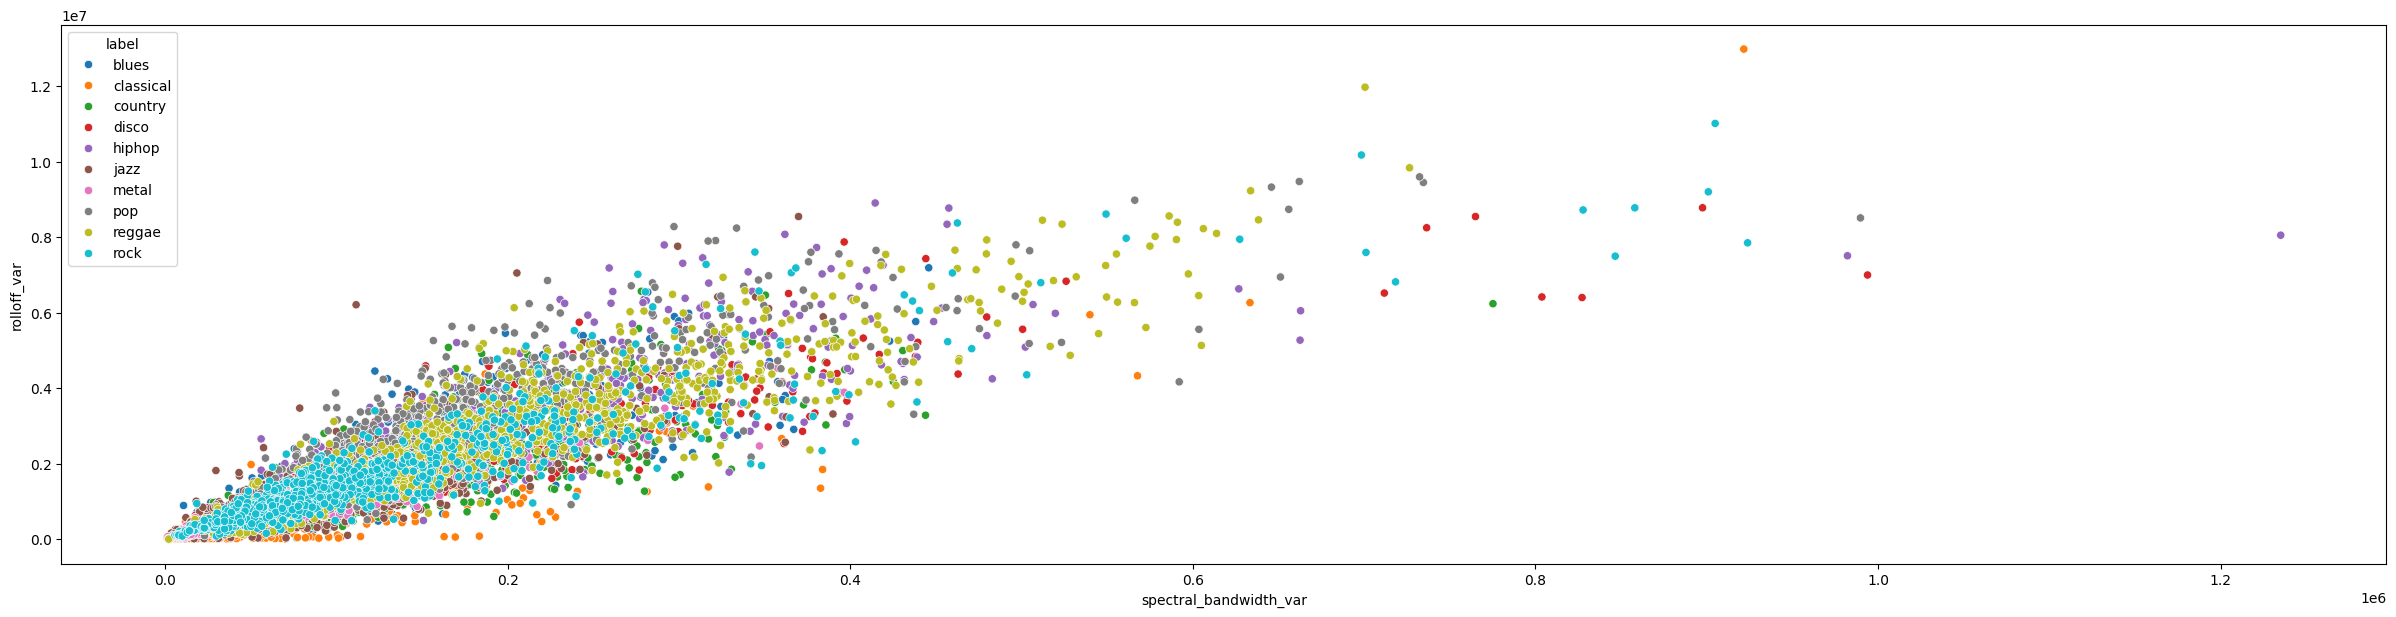

In [20]:
plt.figure(figsize=(30,7))
sns.scatterplot(data=music_data, x="spectral_bandwidth_var", y="rolloff_var", hue='label')


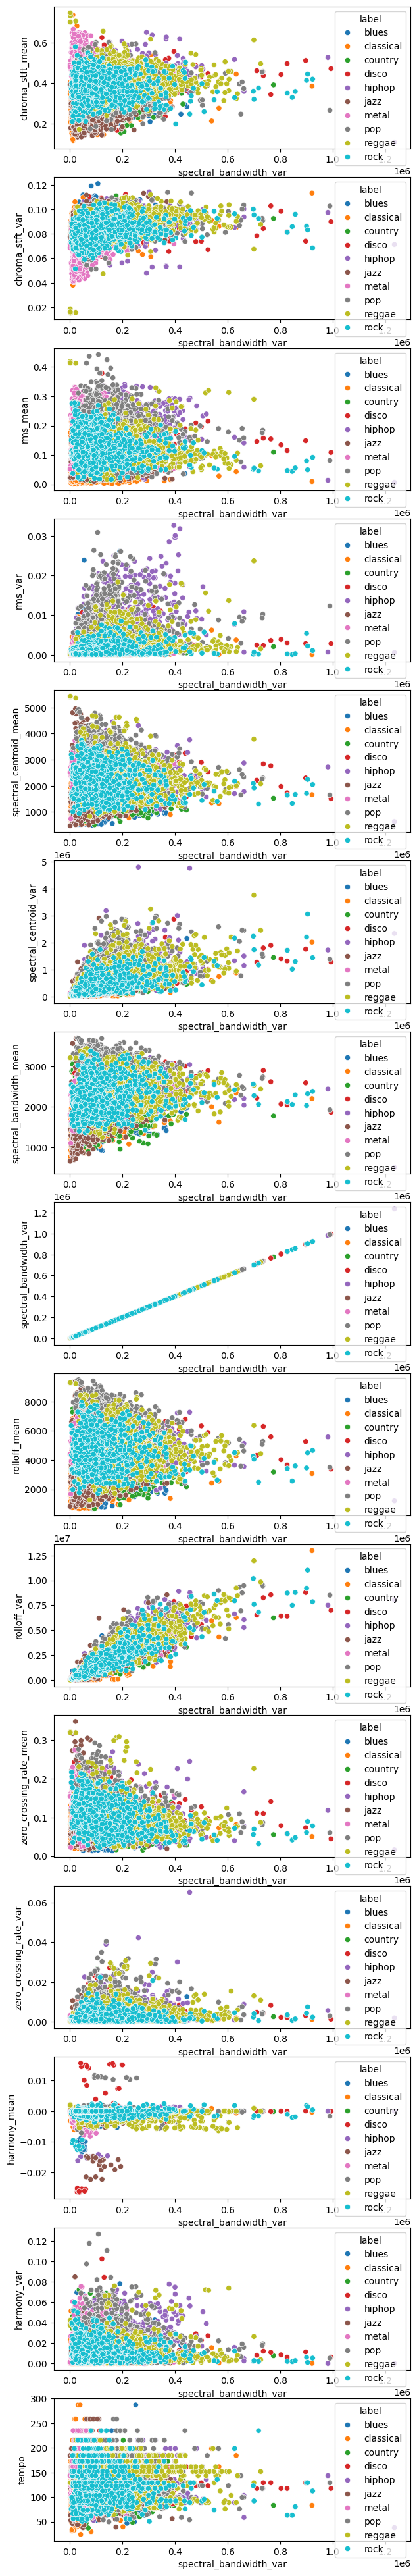

In [18]:
plt.figure(figsize=(7,50))
for i in enumerate(numeric_data.columns):
    plt.subplot(len(numeric_data.columns),1,i[0]+1)
    sns.scatterplot(data=music_data, x="spectral_bandwidth_var", y=i[1], hue='label')


In [ ]:
# music_data = music_data.set_index('label') 

# music_data = music_data.mean(axis=1)

# sns.heatmap(music_data, annot=True)
# label                      0.0
# chroma_stft_mean           0.0
# chroma_stft_var            0.0
# rms_mean                   0.0
# rms_var                    0.0
# spectral_centroid_mean     0.0
# spectral_centroid_var      0.0
# spectral_bandwidth_mean    0.0
# spectral_bandwidth_var     0.0
# rolloff_mean               0.0
# rolloff_var                0.0
# zero_crossing_rate_mean    0.0
# zero_crossing_rate_var     0.0
# harmony_mean               0.0
# harmony_var                0.0
# tempo                      0.0